In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load data

In [2]:
infile_info = '/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/shared_data_Sean/info_ESMFmesh_ctsm_HCDN_nhru_final_671.buff_fix_holes_polygons_simplified_5e-4_split_nested.csv'
inpath_calib = '/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG'

In [3]:
df_info = pd.read_csv(infile_info)
df_info = df_info[10::10]
df_info

,hru_id,ann_P,lon_cen,lat_cen,AREA,elev_mean,ave_T,july_T,Perimeter,distdiff,mesh_id,shp_id,shp_id_allup,shp_id_indup,file_obsQ_allup,file_obsQ_indup,file_obsQ
10,1638480,0.0,-77.67379,39.20060,2.338352e+08,175.122363,NaN,NaN,112488,0.194583,10,80,NaN,NaN,NaN,NaN,/glade/p/ral/hap/common_data/camels/obs_flow_m...
20,2235200,0.0,-81.56596,28.94932,3.006796e+08,21.685811,NaN,NaN,170522,0.194583,20,146,NaN,NaN,NaN,NaN,/glade/p/ral/hap/common_data/camels/obs_flow_m...
30,2246000,0.0,-81.96393,30.14773,4.512270e+08,32.656388,NaN,NaN,193409,0.194583,30,148,NaN,NaN,NaN,NaN,/glade/p/ral/hap/common_data/camels/obs_flow_m...
40,8164600,0.0,-96.96964,28.95038,2.640754e+08,38.618868,NaN,NaN,167321,0.194583,40,464,NaN,NaN,NaN,NaN,/glade/p/ral/hap/common_data/camels/obs_flow_m...
50,8200000,0.0,-99.29425,29.65670,2.491660e+08,472.303644,NaN,NaN,129347,0.194583,50,477,NaN,NaN,NaN,NaN,/glade/p/ral/hap/common_data/camels/obs_flow_m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,3364500,0.0,-85.49655,39.40363,2.424178e+08,278.096234,NaN,NaN,205317,0.194583,630,234,NaN,NaN,NaN,NaN,/glade/p/ral/hap/common_data/camels/obs_flow_m...
640,5514500,0.0,-91.31462,39.11872,2.410553e+09,221.377547,NaN,NaN,437459,0.194583,640,317,NaN,NaN,NaN,NaN,/glade/p/ral/hap/common_data/camels/obs_flow_m...
650,1639500,0.0,-77.05279,39.64560,2.671732e+08,193.505618,NaN,NaN,132187,0.194583,650,81,NaN,NaN,NaN,NaN,/glade/p/ral/hap/common_data/camels/obs_flow_m...
660,6885500,0.0,-96.31728,39.77304,1.075162e+09,402.952514,NaN,NaN,292935,0.194583,660,383,NaN,NaN,NaN,NaN,/glade/p/ral/hap/common_data/camels/obs_flow_m...


In [4]:
index = np.arange(10, 671, 10)

num = len(index)
trial_num = np.zeros(num)
original_kge = np.zeros(num)
best_kge = np.zeros(num)

for i in range(len(index)):
    infile_OstModel = f'{inpath_calib}/CAMELS_{index[i]}_OstCalib/run/OstModel0.txt'
    df_OstModel = pd.read_csv(infile_OstModel, delim_whitespace=True)
    df_OstModel['obj.function'] = df_OstModel['obj.function'].values.astype(float) # some times there is NaN string
    trial_num[i] = len(df_OstModel)
    original_kge[i] = -df_OstModel.iloc[0]['obj.function']
    best_kge[i] = -df_OstModel['obj.function'].min()

# plot

In [5]:
lon, lat = df_info['lon_cen'].values, df_info['lat_cen'].values

In [6]:
def set_background(ax):
    ax.set_extent([-121, -72, 25, 50])

    # Background boundaries
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray')
    
    return ax

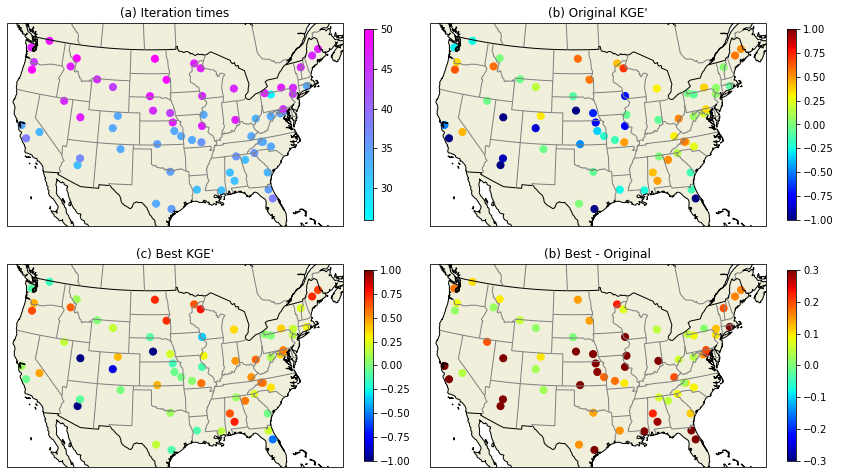

In [7]:
# map

data = [trial_num, original_kge, best_kge, best_kge - original_kge]
title = ["(a) Iteration times", "(b) Original KGE'", "(c) Best KGE'", "(b) Best - Original",]
cmaps = ['cool', 'jet', 'jet', 'jet']
lims = [ [26, 50], [-1, 1], [-1, 1], [-0.3, 0.3]]


font = {'size'   : 15}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=[12, 7])

proj = ccrs.AlbersEqualArea(central_longitude=-100)
transf = ccrs.PlateCarree()

for i in range(4):
    ax = fig.add_subplot(2, 2, i+1, projection=proj)
    ax = set_background(ax)
    p = ax.scatter(lon, lat, 50, data[i], cmap=cmaps[i], vmin=lims[i][0], vmax=lims[i][1], transform=transf)
    ax.set_title(title[i])
    
    cax = plt.colorbar(p, ax=ax, location='right', shrink=0.8)
    cax.ax.yaxis.set_ticks_position('right')
    cax.ax.yaxis.set_label_position('left')
    

plt.tight_layout()
# plt.savefig('CAMELS_calib_kge.png', dpi=600, bbox_inches='tight', pad_inches=0)
# plt.show()

# Plot CDF of KGE'

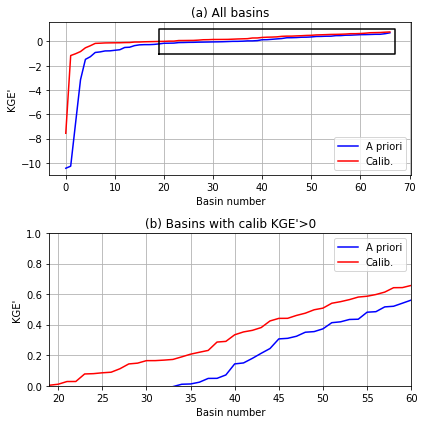

In [8]:
best_kge_sort = np.sort(best_kge)
original_kge_sort = np.sort(original_kge)


font = {'size'   : 10}

matplotlib.rc('font', **font)

fig, axs = plt.subplots(2, 1, figsize=[6, 6])


axi = axs[0]
axi.plot(original_kge_sort, 'b', label='A priori')
axi.plot(best_kge_sort, 'r', label='Calib.')
axi.set_xlabel('Basin number')
axi.set_ylabel("KGE'")
axi.grid('on')
axi.legend()

#add a box
axi.plot([19, 67, 67, 19, 19], [-1, -1, 1, 1, -1], 'k')
axi.set_title('(a) All basins')


axi = axs[1]
axi.plot(original_kge_sort, 'b', label='A priori')
axi.plot(best_kge_sort, 'r', label='Calib.')
axi.set_xlabel('Basin number')
axi.set_ylabel("KGE'")
axi.grid('on')
axi.legend()
axi.set_xlim([19, 60])
axi.set_ylim(0, 1)

axi.set_title("(b) Basins with calib KGE'>0")

plt.tight_layout()
# plt.show()
# plt.savefig('CAMELS_calib_kge_CDF.png', dpi=600, bbox_inches='tight', pad_inches=0)

# Plot PDF of KGE'

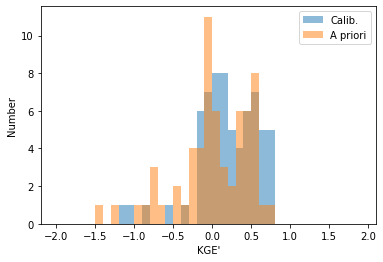

In [77]:
plt.hist(best_kge, np.arange(-2, 2, 0.1), alpha=0.5, label='Calib.')
plt.hist(original_kge, np.arange(-2, 2, 0.1), alpha=0.5, label='A priori')
plt.legend()
plt.ylabel('Number')
plt.xlabel("KGE'")
plt.legend()

# plt.show()
plt.savefig('test_CAMELS_calib_kge_PDF.png', dpi=600, bbox_inches='tight', pad_inches=0)

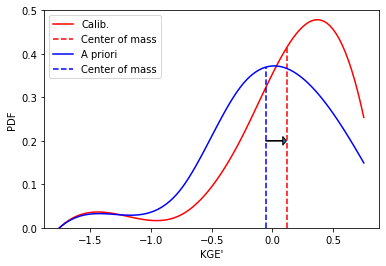

In [79]:
def hist_statistics(data, bins=np.arange(-2, 1.2, 0.1)):
    hist, bins = np.histogram(data, bins=bins, density=False)
    hist = hist / np.sum(~np.isnan(data))
    
    # Calculate the bin centers
    bin_centers = (bins[1:] + bins[:-1]) / 2
    
    # Fit a smooth curve to the histogram
    f = interp1d(bin_centers, hist, kind='cubic')
    bin_centers_smooth = np.linspace(bin_centers.min(), bin_centers.max(), 100)
    hist_smooth = f(bin_centers_smooth)
    
    bin_widths = np.abs(bin_centers_smooth[0]-bin_centers_smooth[1])
    mass_center = np.sum(bin_centers_smooth * hist_smooth * bin_widths) / np.sum(hist_smooth * bin_widths)
    hist_mass_center = f(mass_center)
    

    return hist, bin_centers, hist_smooth, bin_centers_smooth, hist_mass_center, mass_center

font = {'size'   : 10}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize=[6, 4])

hist, bin_centers, hist_smooth, bin_centers_smooth, hist_mass_center, mass_center1 = hist_statistics(best_kge, np.arange(-2, 1.2, 0.5))
# plt.plot(bin_centers, hist, 'o-', label='Calib.')
plt.plot(bin_centers_smooth, hist_smooth, color='r', label='Calib.')
plt.plot([mass_center1, mass_center1], [0, hist_mass_center], linestyle='--', color='r', label='Center of mass')

hist, bin_centers, hist_smooth, bin_centers_smooth, hist_mass_center, mass_center2 = hist_statistics(original_kge, np.arange(-2, 1.2, 0.5))
plt.plot(bin_centers_smooth, hist_smooth, color='b', label='A priori')
plt.plot([mass_center2, mass_center2], [0, hist_mass_center], linestyle='--', color='b', label='Center of mass')

plt.legend()
plt.ylabel('PDF')
plt.xlabel("KGE'")
plt.legend()
plt.ylim(0, 0.5)

plt.arrow(mass_center2, 0.2, 0.14, 0, head_width=0.02, head_length=0.03)

plt.savefig('CAMELS_calib_kge_PDF.png', dpi=600, bbox_inches='tight', pad_inches=0)

# Find basins with high calibrated KGE' and large improvement

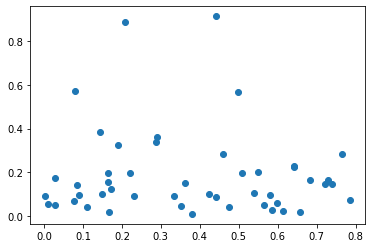

In [64]:
index = best_kge>0
plt.scatter(best_kge[index], best_kge[index]-original_kge[index])

9 0.642709 0.418786
12 0.764673 0.481656
17 0.441624 -0.473679
55 0.642027 0.413035


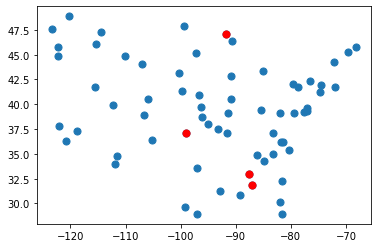

In [75]:
kge_diff = best_kge - original_kge
index = np.where(((best_kge>0.4) & (kge_diff>0.7)) | ((best_kge>0.6) & (kge_diff > 0.2)))[0]
for i in index:
    print(i, best_kge[i], original_kge[i])
    
    
plt.scatter(lon, lat, 50)
plt.scatter(lon[index], lat[index], 50, 'r')

In [72]:
df_info.iloc[index]

,hru_id,ann_P,lon_cen,lat_cen,AREA,elev_mean,ave_T,july_T,Perimeter,distdiff,mesh_id,shp_id,shp_id_allup,shp_id_indup,file_obsQ_allup,file_obsQ_indup,file_obsQ
100,2465493,0.0,-87.52709,32.96997,8.662051e+07,110.340659,NaN,NaN,91504,0.194583,100,184,NaN,NaN,NaN,NaN,/glade/p/ral/hap/common_data/camels/obs_flow_m...
130,2427250,0.0,-86.96174,31.87034,6.806527e+08,97.750000,NaN,NaN,234416,0.194583,130,177,NaN,NaN,NaN,NaN,/glade/p/ral/hap/common_data/camels/obs_flow_m...
180,7148400,0.0,-99.03979,37.10984,2.560537e+09,554.194521,NaN,NaN,491846,0.194583,180,409,NaN,NaN,NaN,NaN,/glade/p/ral/hap/common_data/camels/obs_flow_m...
560,4015330,0.0,-91.81157,47.04074,2.258416e+08,377.122271,NaN,NaN,125728,0.194583,560,255,NaN,NaN,NaN,NaN,/glade/p/ral/hap/common_data/camels/obs_flow_m...
